# CNN Model

In [39]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import itertools

In [13]:
tf.keras.backend.set_image_data_format('channels_last')

In [14]:
CLASSES = ['bakasana','sarvangasana','trikonasana']

In [15]:
train_path = './data/train/'
valid_path = './data/valid/'
test_path = './data/test/'
custom = './data/custom/'

## Processing Test Data

In [41]:
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
)

In [42]:
train_batches = datagen \
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=CLASSES, batch_size=32)
valid_batches = datagen \
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=CLASSES, batch_size=32)
test_batches = datagen \
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=CLASSES, batch_size=32, shuffle=False)


Found 1287 images belonging to 3 classes.
Found 367 images belonging to 3 classes.
Found 183 images belonging to 3 classes.


In [18]:
test_imgs, test_labels = next(test_batches)
custom_imgs, custom_labels = next(custom_batches)

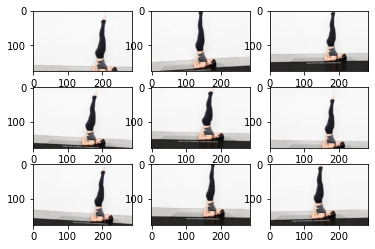

In [43]:
img = load_img('./data/train/sarvangasana/00000004.jpg')        # Sample Image

data = img_to_array(img)

samples = np.expand_dims(data, 0)


it = datagen.flow(samples, batch_size=1)

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
# show the figure
plt.show()

## Model

In [46]:
ep = 20    # epochs

In [26]:
vgg = tf.keras.applications.vgg16.VGG16()

- Copy layers from vgg16
- freeze them
- adding output layer

In [29]:
model = Sequential()     # Creating our own model
for layer in vgg.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False

In [37]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
    
# Output layer
model.add(Dense(len(CLASSES), activation="softmax"))

Compile Model

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
model.fit(x=train_batches,
steps_per_epoch=len(train_batches),
validation_data=valid_batches,
validation_steps=len(valid_batches),
epochs=ep,
verbose=1
)

model.save('./saved-models/yo-model-I')

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
41/41 [==============================] - ETA: 0s - loss: 1.3372 - accuracy: 0.5385WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002070B58A5E8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Testing

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Confusion matrix, without normalization
[[50  6  3]
 [ 5 56  4]
 [ 2  4 53]]


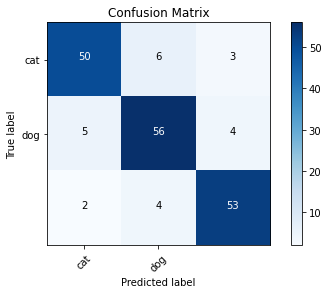

In [53]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [26]:
cm = confusion_matrix(y_true=custom_batches.classes, y_pred=np.argmax(predictions, axis=-1))